# WSB Subreddit analysis from Apr 2022 - Apr 2023

## 1. Load the data and execute data preprocessing

### 1-1. Load the data

In [66]:
# Import necessary packages
import pandas as pd
import numpy as np
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from collections import Counter
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import scattertext as st

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gimmin-u/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gimmin-u/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Load the data
df = pd.read_csv('wallstreetbets_2022.csv')
df.head()

/var/folders/xg/pgt148v93mggj9tts56rdk480000gn/T/ipykernel_27977/452054100.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('wallstreetbets_2022.csv')


,title,score,id,url,comms_num,created,body,timestamp
0,Wash sale,0,txhzpp,https://www.reddit.com/r/wallstreetbets/commen...,8.0,1.649236e+09,Hi guys I bought uvxy beginning of the year in...,2022-04-06 09:14:16
1,Comment,1,i3lsqo4,NaN,0.0,1.649238e+09,Yes December 30 I sold it,2022-04-06 09:32:46
2,Comment,1,i3lrk43,NaN,0.0,1.649237e+09,![img](emote|t5_2th52|4260) Just need help,2022-04-06 09:15:56
3,Comment,1,i3lmzkh,NaN,0.0,1.649233e+09,??? Alright bro.,2022-04-06 08:10:16
4,Comment,1,i3lmz13,NaN,0.0,1.649233e+09,Elon is with more than some of the S&P 500 com...,2022-04-06 08:10:03


In [3]:
# Add the column "year_month"
df['year_month'] = pd.to_datetime(df['timestamp']).dt.strftime('%Y-%m')
df.head()

,title,score,id,url,comms_num,created,body,timestamp,year_month
0,Wash sale,0,txhzpp,https://www.reddit.com/r/wallstreetbets/commen...,8.0,1.649236e+09,Hi guys I bought uvxy beginning of the year in...,2022-04-06 09:14:16,2022-04
1,Comment,1,i3lsqo4,NaN,0.0,1.649238e+09,Yes December 30 I sold it,2022-04-06 09:32:46,2022-04
2,Comment,1,i3lrk43,NaN,0.0,1.649237e+09,![img](emote|t5_2th52|4260) Just need help,2022-04-06 09:15:56,2022-04
3,Comment,1,i3lmzkh,NaN,0.0,1.649233e+09,??? Alright bro.,2022-04-06 08:10:16,2022-04
4,Comment,1,i3lmz13,NaN,0.0,1.649233e+09,Elon is with more than some of the S&P 500 com...,2022-04-06 08:10:03,2022-04


In [4]:
# Make a df called "content" that concatenates the title and the body.
df.fillna('', inplace=True)
df['content'] = df.apply(lambda row: row['title'] + ' ' + row['body'] if row['title'] != 'Comment' else row['body'], axis=1)
df.head()

,title,score,id,url,comms_num,created,body,timestamp,year_month,content
0,Wash sale,0,txhzpp,https://www.reddit.com/r/wallstreetbets/commen...,8.0,1649236456.0,Hi guys I bought uvxy beginning of the year in...,2022-04-06 09:14:16,2022-04,Wash sale Hi guys I bought uvxy beginning of t...
1,Comment,1,i3lsqo4,,0.0,1649237566.0,Yes December 30 I sold it,2022-04-06 09:32:46,2022-04,Yes December 30 I sold it
2,Comment,1,i3lrk43,,0.0,1649236556.0,![img](emote|t5_2th52|4260) Just need help,2022-04-06 09:15:56,2022-04,![img](emote|t5_2th52|4260) Just need help
3,Comment,1,i3lmzkh,,0.0,1649232616.0,??? Alright bro.,2022-04-06 08:10:16,2022-04,??? Alright bro.
4,Comment,1,i3lmz13,,0.0,1649232603.0,Elon is with more than some of the S&P 500 com...,2022-04-06 08:10:03,2022-04,Elon is with more than some of the S&P 500 com...


### B. Data preprocessing

In [5]:
# convert text to lowercase
df['content'] = df['content'].str.lower()

# remove punctuation
df['content'] = df['content'].str.replace('[^\w\s]', '')

# remove numbers
df['content'] = df['content'].str.replace('\d+', '')

# remove stopwords
stop = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

# remove extra whitespace
df['content'] = df['content'].str.strip()

/var/folders/xg/pgt148v93mggj9tts56rdk480000gn/T/ipykernel_27977/2049891639.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('[^\w\s]', '')
/var/folders/xg/pgt148v93mggj9tts56rdk480000gn/T/ipykernel_27977/2049891639.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('\d+', '')


In [6]:
# Split the data into submission and comment
df_submissions = df[df["title"]!="Comment"]
df_comments = df[df["title"]=="Comment"]

In [7]:
# The final dataframe is shown below:
df.head(3)

,title,score,id,url,comms_num,created,body,timestamp,year_month,content
0,Wash sale,0,txhzpp,https://www.reddit.com/r/wallstreetbets/commen...,8.0,1649236456.0,Hi guys I bought uvxy beginning of the year in...,2022-04-06 09:14:16,2022-04,wash sale hi guys bought uvxy beginning year t...
1,Comment,1,i3lsqo4,,0.0,1649237566.0,Yes December 30 I sold it,2022-04-06 09:32:46,2022-04,yes december sold
2,Comment,1,i3lrk43,,0.0,1649236556.0,![img](emote|t5_2th52|4260) Just need help,2022-04-06 09:15:56,2022-04,imgemotet_th need help


## 2. Textual Analysis

### 2-1 Check the most frequently appeared words.

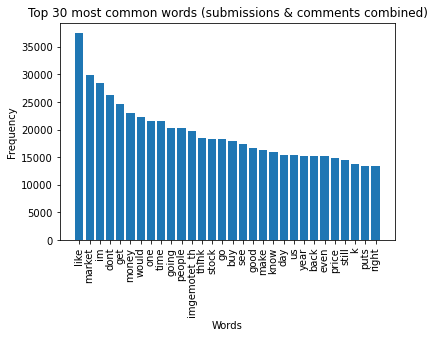

In [8]:
# 1.Word count of both submissions and commments

# Combine all the content into a single string
all_content = ' '.join(df['content'].astype(str).tolist())

# Split the string into individual words and count their frequency
word_counts = Counter(all_content.split())

# Get the top 20 most common words and their counts
top_words = [word for word, count in word_counts.most_common(30)]
word_counts_top = [count for word, count in word_counts.most_common(30)]

# Plot the bar chart
plt.bar(top_words, word_counts_top)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 most common words (submissions & comments combined)')
plt.show()

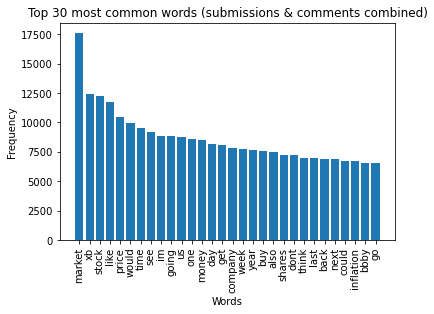

In [9]:
# 2.Word count of submissions only

# Combine all the content into a single string
all_content = ' '.join(df_submissions['content'].astype(str).tolist())

# Split the string into individual words and count their frequency
word_counts = Counter(all_content.split())

# Get the top 20 most common words and their counts
top_words = [word for word, count in word_counts.most_common(30)]
word_counts_top = [count for word, count in word_counts.most_common(30)]

# Plot the bar chart
plt.bar(top_words, word_counts_top)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 most common words (submissions & comments combined)')
plt.show()

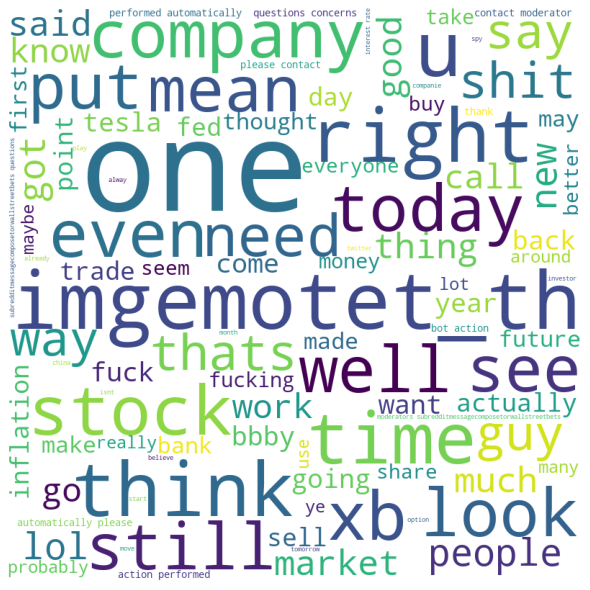

In [10]:
# Combine all the content into a single string
all_content = ' '.join(df['content'].astype(str).tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate(all_content)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

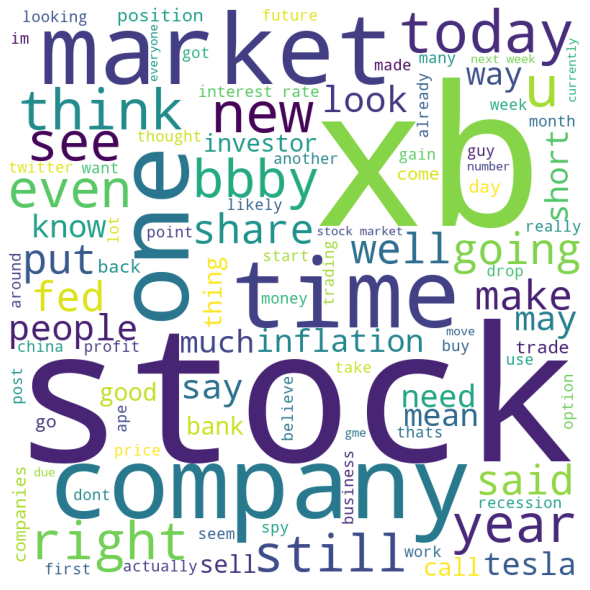

In [11]:
# Combine all the content into a single string
all_content = ' '.join(df_submissions['content'].astype(str).tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate(all_content)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 2-2.Sentiment analysis

#### First, we measure the sentiments of submissions and comments with VADER

In [12]:
# Check the positive, negative, and neutral. 
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"  

In [13]:
# Plotting function
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts', size=12)
    ax2.set_ylabel(f'Percentage', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

In [14]:
df['content_sentiment'] = df['content'].apply(lambda x: find_sentiment(x))

In [15]:
df.head(3)

,title,score,id,url,comms_num,created,body,timestamp,year_month,content,content_sentiment
0,Wash sale,0,txhzpp,https://www.reddit.com/r/wallstreetbets/commen...,8.0,1649236456.0,Hi guys I bought uvxy beginning of the year in...,2022-04-06 09:14:16,2022-04,wash sale hi guys bought uvxy beginning year t...,Positive
1,Comment,1,i3lsqo4,,0.0,1649237566.0,Yes December 30 I sold it,2022-04-06 09:32:46,2022-04,yes december sold,Positive
2,Comment,1,i3lrk43,,0.0,1649236556.0,![img](emote|t5_2th52|4260) Just need help,2022-04-06 09:15:56,2022-04,imgemotet_th need help,Positive


#### Second, we plot the distributions of 3 different sentiments of the entire corpus

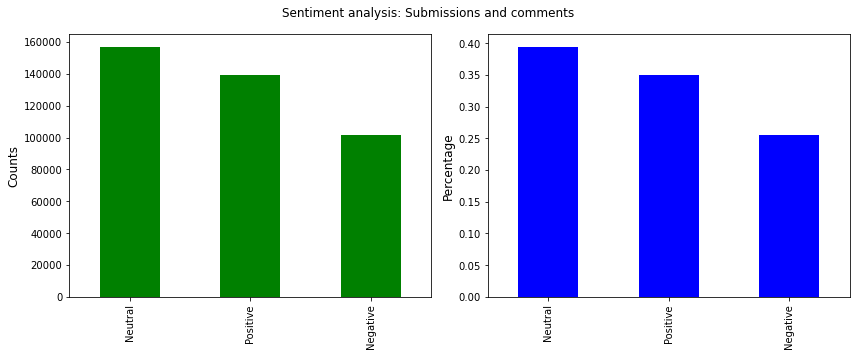

In [16]:
# First, we consider both submissions and comments
plot_sentiment(df, 'content_sentiment', 'Submissions and comments')

In [17]:
# update the df_submissions and df_comments
df_submissions = df[df["title"]!="Comment"]
df_comments = df[df["title"]=="Comment"]

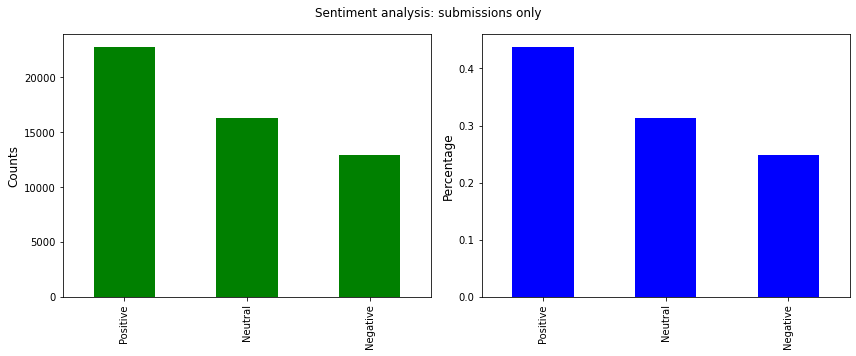

In [18]:
# Second, we consider the submissions only
plot_sentiment(df_submissions, 'content_sentiment', 'submissions only')

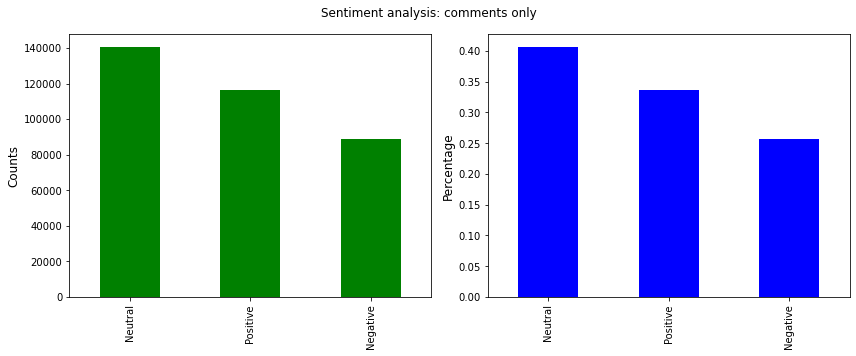

In [19]:
# Third, we consider the comments only 
plot_sentiment(df_comments, 'content_sentiment', 'comments only')

We also plot the wordcloud for positive and negative submissions as shown below:

In [20]:
df_submissions_positive = df_submissions[df["content_sentiment"]=="Positive"]
df_submissions_negative = df_submissions[df["content_sentiment"]=="Negative"]

/var/folders/xg/pgt148v93mggj9tts56rdk480000gn/T/ipykernel_27977/2296699830.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_submissions_positive = df_submissions[df["content_sentiment"]=="Positive"]
/var/folders/xg/pgt148v93mggj9tts56rdk480000gn/T/ipykernel_27977/2296699830.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_submissions_negative = df_submissions[df["content_sentiment"]=="Negative"]


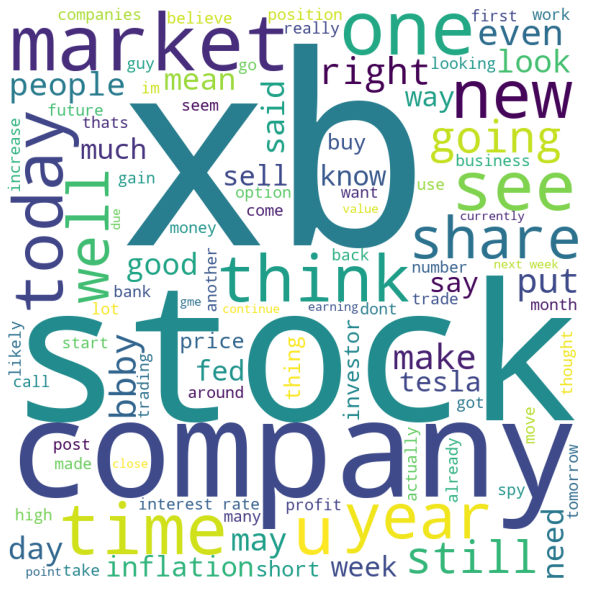

In [21]:
# Combine all the content into a single string
all_content = ' '.join(df_submissions_positive['content'].astype(str).tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate(all_content)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

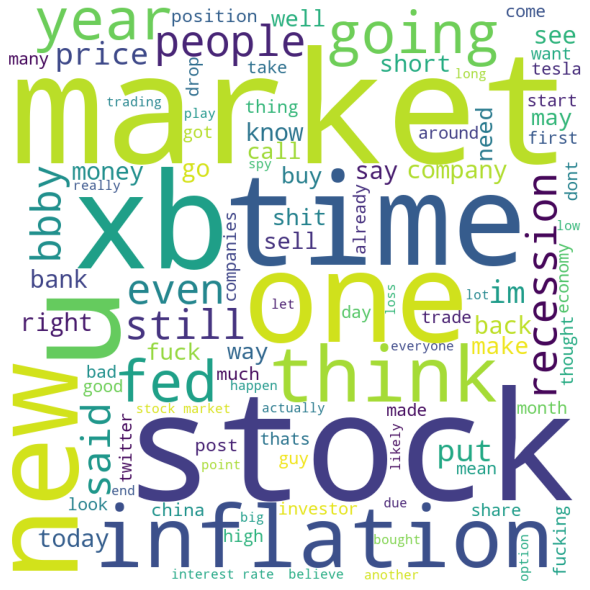

In [22]:
# Combine all the content into a single string
all_content = ' '.join(df_submissions_negative['content'].astype(str).tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate(all_content)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Third, we analyze the change of the proportions of positive & negative sentiment over time

In [23]:
df_grouped = df.groupby(['year_month', 'content_sentiment']).size().unstack()
df_grouped = df_grouped.iloc[3:]
df_grouped["total"] = df_grouped["Negative"] + df_grouped["Neutral"] + df_grouped["Positive"]
df_grouped["Negative"] = df_grouped["Negative"] / df_grouped["total"]
df_grouped["Neutral"] = df_grouped["Neutral"] / df_grouped["total"]
df_grouped["Positive"] = df_grouped["Positive"] / df_grouped["total"]
df_grouped = df_grouped.drop("total", axis=1)

In [24]:
df_grouped.head(100)

content_sentiment,Negative,Neutral,Positive
year_month,,,
2022-04,0.272959,0.380122,0.346918
2022-05,0.272033,0.391448,0.336519
2022-06,0.278947,0.391335,0.329718
2022-07,0.273736,0.379369,0.346895
2022-08,0.251571,0.372145,0.376284
2022-09,0.260623,0.383090,0.356286
2022-10,0.248270,0.391458,0.360271
2022-11,0.253860,0.390141,0.356000
2022-12,0.245698,0.403170,0.351132


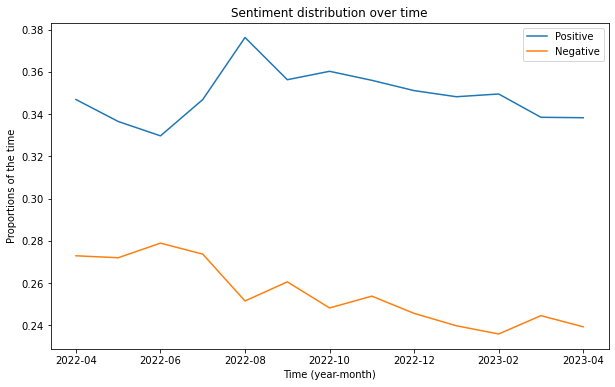

In [25]:
# Plot the stacked bar chart
ax = df_grouped["Positive"].plot(kind='line', stacked=False, figsize=(10, 6))
ax = df_grouped["Negative"].plot(kind='line', stacked=False, figsize=(10, 6))

# Set the axis labels and title
ax.set_xlabel('Time (year-month)')
ax.set_ylabel('Proportions of the time')
ax.set_title('Sentiment distribution over time')
ax.legend(['Positive', 'Negative'])

# Show the plot
plt.show()

### Fourth, we load the s&p500 data at the same period, and find the correlations. 

In [26]:
# Load the s&p500 data and execute some preprocessing.
df_snp = pd.read_csv('snp500.csv')
df_snp['year_month'] = pd.to_datetime(df_snp['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m')
df_snp['Price'] = df_snp['Price'].str.replace(',', '')
df_snp['Price'] = df_snp['Price'].str[:7]
df_snp['Price'] = df_snp['Price'].astype(float)
df_snp = df_snp.iloc[::-1]

In [27]:
df_snp.head()

,Date,Price,Open,High,Low,Vol.,Change %,year_month
259,04/01/2022,4545.86,"4,540.32","4,548.70","4,507.57",NaN,0.34%,2022-04
258,04/04/2022,4582.64,"4,547.97","4,583.50","4,539.21",NaN,0.81%,2022-04
257,04/05/2022,4525.12,"4,572.45","4,593.45","4,514.17",NaN,-1.26%,2022-04
256,04/06/2022,4481.15,"4,494.17","4,503.94","4,450.04",NaN,-0.97%,2022-04
255,04/07/2022,4500.21,"4,474.65","4,521.16","4,450.30",NaN,0.43%,2022-04


In [28]:
# Compute the average index for each month
df_snpavg = df_snp.groupby('year_month')['Price'].mean().reset_index()
df_snpavg['Price'] = df_snpavg['Price'].round(2)
df_snpavg.head()

,year_month,Price
0,2022-04,4391.30
1,2022-05,4040.62
2,2022-06,3898.95
3,2022-07,3911.73
4,2022-08,4158.56


In [29]:
# merge the average price to the sentiment proportions table.
df_merged = pd.merge(df_grouped, df_snpavg[['year_month', 'Price']], on='year_month', how='left')
df_merged.head(3)

,year_month,Negative,Neutral,Positive,Price
0,2022-04,0.272959,0.380122,0.346918,4391.30
1,2022-05,0.272033,0.391448,0.336519,4040.62
2,2022-06,0.278947,0.391335,0.329718,3898.95


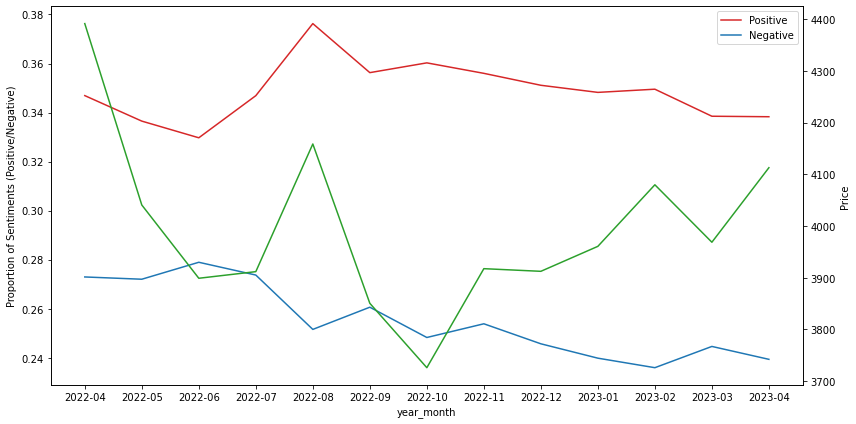

In [30]:
# Plot the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = 'tab:red'
color2 = 'tab:blue'
ax1.set_xlabel('year_month')
ax1.set_ylabel('Proportion of Sentiments (Positive/Negative)')
ax1.plot(df_merged['year_month'], df_merged['Positive'], color=color1)
ax1.plot(df_merged['year_month'], df_merged['Negative'], color=color2)
ax1.tick_params(axis='y')
ax1.legend(['Positive', 'Negative'])

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('Price')
ax2.plot(df_merged['year_month'], df_merged['Price'], color=color)
ax2.tick_params(axis='y')

fig.tight_layout()  
plt.show()

In [31]:
correlation_positive = df_merged['Positive'].corr(df_merged['Price'])
correlation_negative = df_merged['Negative'].corr(df_merged['Price'])
print("P_positive:", correlation_positive)
print("P_negative:", correlation_negative)

P_positive: -0.025809065981308926
P_negative: 0.09002428460673353


Opposite to the intuition, the stock market in this period has the negative correlations with the positive sentiment, and positive correlations with negative sentiment. 

However, we observed the obvious high correlations in the time period between 2022-04 and 2022-09.

Therefore, we re-computed the correlations in this period.

In [32]:
df_retrieved = df_merged.head(6)
correlation_positive = df_retrieved['Positive'].corr(df_retrieved['Price'])
correlation_negative = df_retrieved['Negative'].corr(df_retrieved['Price'])
print("P_positive:", correlation_positive)
print("P_negative:", correlation_negative)

P_positive: 0.24563394863060783
P_negative: -0.10453031295742653


As such, it showed the result that is more parallel to our intuition.

One possible explanation could be that, by October 2022, there was an obvious signal of the peak-out of the inflation rate in the US (CPI index). Therefore, more people in the market expected the Federal Reserves to turn dovish again and revitalize the stock market.

### 2-3. Fighting In Words

First, we run the fighting in words model categorized by the sentiment

In [33]:
# Save the submissions data btw.
df_submissions.to_csv('submissions.csv', index=False)

In [50]:
# drop the submissions with the neutral sentiments.
df_drop_neutral = df_submissions[df_submissions["content_sentiment"]!="Neutral"]
df_drop_neutral = df_drop_neutral.sample(n=2000, random_state=42)

# make a new column that parses
df_drop_neutral = df_drop_neutral.assign(
    parse = lambda df_drop_neutral: df_drop_neutral.content.apply(st.whitespace_nlp_with_sentences)
)

# define the corpus and the category column
corpus = st.CorpusFromParsedDocuments(
    df_drop_neutral, category_col='content_sentiment', parsed_col='parse'
).build().get_unigram_corpus().compact(st.AssociationCompactor(2000))

# make the html file
html = st.produce_scattertext_explorer(
    corpus,
    category='Positive', category_name='Positive', not_category_name='Negative',
    minimum_term_frequency=0, pmi_threshold_coefficient=0,
    width_in_pixels=1000, metadata=corpus.get_df()['id'],
    transform=st.Scalers.dense_rank
)
open('./by_sentiment.html', 'w').write(html)

2010840

Second, we repeat it with the one categorized by the scores. We divide the submissions into half by the median value of the scores.

In [94]:
df['score'] = pd.to_numeric(df['score'], errors='coerce')
df["score_group"] = np.where(df["score"]>df_submissions["score"].median(),1,0)

In [91]:
# drop the submissions with the neutral sentiments.
df_subsmissions_subset = df_submissions.sample(n=5000, random_state=42)

# make a new column that parses
df_subsmissions_subset = df_subsmissions_subset.assign(
    parse = lambda df_subsmissions_subset: df_subsmissions_subset.content.apply(st.whitespace_nlp_with_sentences)
)

# define the corpus and the category column
corpus = st.CorpusFromParsedDocuments(
    df_subsmissions_subset, category_col='score_group', parsed_col='parse'
).build().get_unigram_corpus().compact(st.AssociationCompactor(2000))

# make the html file
html = st.produce_scattertext_explorer(
    corpus,
    category='1', category_name='High score group', not_category_name='Low score group',
    minimum_term_frequency=0, pmi_threshold_coefficient=0,
    width_in_pixels=1000, metadata=corpus.get_df()['id'],
    transform=st.Scalers.dense_rank
)
open('./by_score.html', 'w').write(html)

2989001

Third, we repeat it with the one categorized by the number of comments. 
We divide the submissions into half by the median value of the comments number.

In [103]:
df['comms_num'] = pd.to_numeric(df['comms_num'], errors='coerce')
df["comment_group"] = np.where(df["comms_num"] > df["comms_num"].median(),1,0)

In [110]:
df_submissions = df[df['title']!="Comment"]

In [112]:
# drop the submissions with the neutral sentiments.
df_subsmissions_subset = df_submissions.sample(n=5000, random_state=42)

# make a new column that parses
df_subsmissions_subset = df_subsmissions_subset.assign(
    parse = lambda df_subsmissions_subset: df_subsmissions_subset.content.apply(st.whitespace_nlp_with_sentences)
)

# define the corpus and the category column
corpus = st.CorpusFromParsedDocuments(
    df_subsmissions_subset, category_col='comment_group', parsed_col='parse'
).build().get_unigram_corpus().compact(st.AssociationCompactor(2000))

# make the html file
html = st.produce_scattertext_explorer(
    corpus,
    category='1', category_name='many comments', not_category_name='not many comments',
    minimum_term_frequency=0, pmi_threshold_coefficient=0,
    width_in_pixels=1000, metadata=corpus.get_df()['id'],
    transform=st.Scalers.dense_rank
)
open('./by_comment_number.html', 'w').write(html)

2950457

In [ ]:
## 3. 